In [2]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase: Teorema de convolución</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

<p style="text-align:center">
	<img src="resumen_convolution_theorem.png" alt="MDOF" width=60%/></a><br>
    <strong> Figura 1: Teorema de convolución.</strong>
</p>

In [3]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import EngFormatter

from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
from scipy.signal import convolve
import scipy.fftpack
from scipy.fft import fft, ifft, fftfreq
from scipy.fftpack import rfft, irfft
import IPython.display as ipd


In [4]:
def TF(s, fs):
    N = s.shape[0]
    Ni = int(N/2)
    
    secs = N / float(fs)                                # duration of the signal
    Ts = 1.0/fs                                         # regular sampling time interval
    t = np.arange(0, secs, Ts)                          # time vector as scipy arange field / numpy.ndarray
    S = fft(s)
    S_mag = abs(fft(s))
    S_side = S[range(Ni)]                               # one side FFT range
    freqs = scipy.fftpack.fftfreq(s.size, t[1]-t[0])
    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(Ni)]                       # one side frequency range
    fft_freqs_side = np.array(freqs_side)
    return (t, freqs, freqs_side, S, S_mag, S_side)

In [5]:
sampleRate = 44100
frequency = 25
length = 5

t = np.linspace(0, length, sampleRate * length)  #  Produces a 5 second Audio-File
y = np.sin(frequency * 2 * np.pi * t)            #  Has frequency of 440Hz

wavfile.write('Sine_25Hz.wav', sampleRate, y)

In [7]:
s25_filename = 'Sine_25Hz.wav' #'Lore_mary_had.wav'
s440_filename = 'Sine_440Hz.wav' #'Lore_mary_had.wav'
s1000_filename = 'Sine_1000Hz.wav' #'Lore_mary_had.wav'
h_filename = 'catedral_valdivia.wav'

fs , s25 = scipy.io.wavfile.read(s25_filename)
fs , s440 = scipy.io.wavfile.read(s440_filename)
fs , s1000 = scipy.io.wavfile.read(s1000_filename)
fs , h = scipy.io.wavfile.read(h_filename)

s25 = s25/max(s25)
s440 = s440/max(s440)
s1000 = s1000/max(s1000)
h = h/max(h)

s25_duration = len(s25)/fs
s440_duration = len(s440)/fs
s1000_duration = len(s1000)/fs
s25_time = np.arange(0,s25_duration,1/fs) #time vector
s440_time = np.arange(0,s440_duration,1/fs) #time vector
s1000_time = np.arange(0,s1000_duration,1/fs) #time vector

h_duration = len(h)/fs
h_time = np.arange(0,h_duration,1/fs) #time vector

yc25 = convolve(s25, h, mode='full')
yc440 = convolve(s440, h, mode='full')
yc1000 = convolve(s1000, h, mode='full')

yc25_duration = len(yc25)/fs
yc440_duration = len(yc440)/fs
yc1000_duration = len(yc1000)/fs

yc25_time = np.arange(0,yc25_duration,1/fs) #time vector
yc440_time = np.arange(0,yc440_duration,1/fs) #time vector
yc1000_time = np.arange(0,yc1000_duration,1/fs) #time vector

In [ ]:
print(fs)

<IPython.core.display.Javascript object>


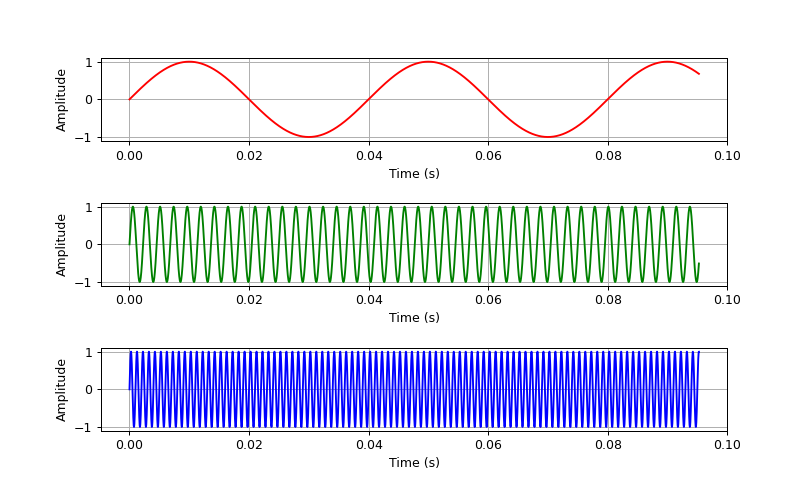

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(s25_time[0:4202], s25[0:4202], "r") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

#figura 2, ax2
ax2.plot(s440_time[0:4202], s440[0:4202], "g") # plotting the positive fft spectrum
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.grid()

#figura 3, ax3
ax3.plot(s1000_time[0:4202], s1000[0:4202], "b") # plotting the positive fft spectrum
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.grid()

plt.rcParams.update({'font.size': 14})

In [ ]:
ipd.Audio(s, rate = fs)

<IPython.core.display.Javascript object>


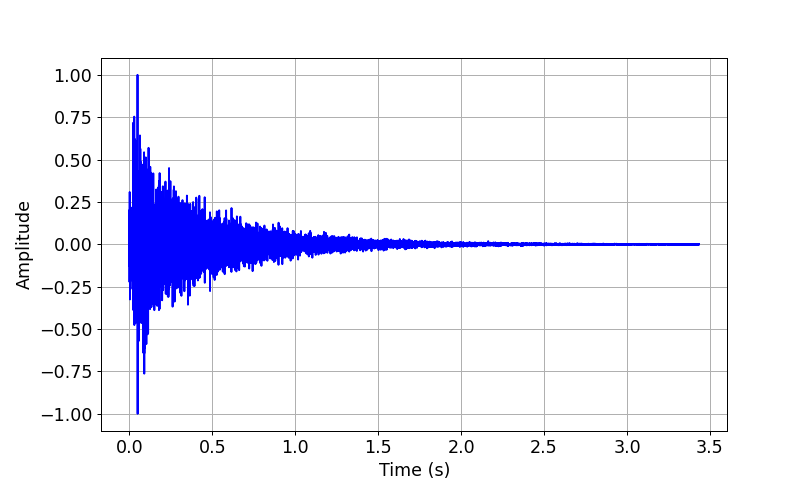

In [9]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.5)

#figura 1, ax1
ax1.plot(h_time, h, "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

plt.rcParams.update({'font.size': 14})

In [10]:
yc25   = convolve(s25, h, mode='full')
yc440  = convolve(s440, h, mode='full')
yc1000 = convolve(s1000, h, mode='full')

yc25   = yc25/max(yc25)
yc440  = yc440/max(yc440)
yc1000 = yc1000/max(yc1000)

yc25_duration = len(yc25)/fs
yc440_duration = len(yc440)/fs
yc1000_duration = len(yc1000)/fs

yc25_time   = np.arange(0,yc25_duration,1/fs) #time vector
yc440_time  = np.arange(0,yc440_duration,1/fs) #time vector
yc1000_time = np.arange(0,yc1000_duration,1/fs) #time vector

<IPython.core.display.Javascript object>


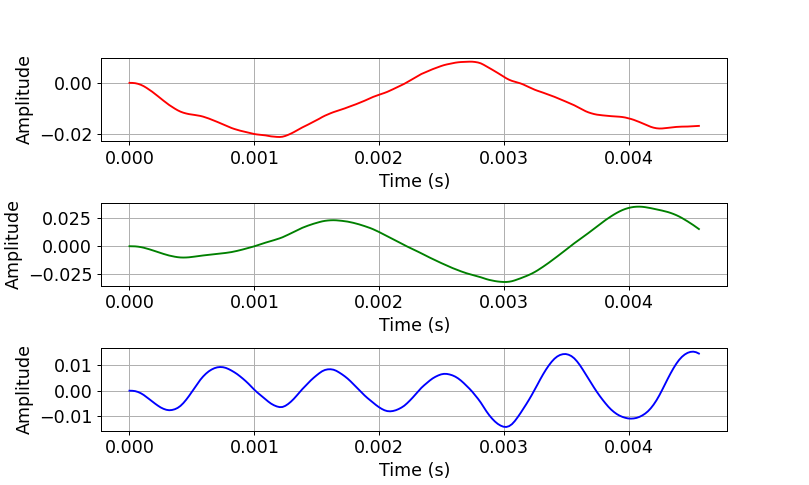

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(yc25_time[0:202], yc25[0:202], "r") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

#figura 2, ax2
ax2.plot(yc440_time[0:202], yc440[0:202], "g") # plotting the positive fft spectrum
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.grid()

#figura 1, ax1
ax3.plot(yc1000_time[0:202], yc1000[0:202], "b") # plotting the positive fft spectrum
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.grid()

plt.rcParams.update({'font.size': 14})

In [ ]:
ipd.Audio(yc, rate = fs)

In [12]:
ts25, freqss25, freqs_sides25, S25, S_mag25, S_side25             = TF(s25, fs)
ts440, freqss440, freqs_sides440, S440, S_mag440, S_side440       = TF(s440, fs)
ts1000, freqss1000, freqs_sides1000, S1000, S_mag1000, S_side1000 = TF(s1000, fs)

th, freqsh, freqs_sideh, H, H_mag, H_side                         = TF(h, fs)

tyc25, freqsyc25, freqs_sideyc25, Yc25, Yc_mag25, Yc_side25             = TF(yc25, fs)
tyc440, freqsyc440, freqs_sideyc440, Yc440, Yc_mag440, Yc_side440       = TF(yc440, fs)
tyc1000, freqsyc1000, freqs_sideyc1000, Yc1000, Yc_mag1000, Yc_side1000 = TF(yc1000, fs)

In [13]:
S_side25    = abs(S_side25)/max(S_side25)
S_side440   = abs(S_side440)/max(S_side440)
S_side1000  = abs(S_side1000)/max(S_side1000)

H_side      = abs(H_side)/max(H_side)

Yc_side25   = abs(Yc_side25)/max(Yc_side25)
Yc_side440  = abs(Yc_side440)/max(Yc_side440)
Yc_side1000 = abs(Yc_side1000)/max(Yc_side1000)

<IPython.core.display.Javascript object>


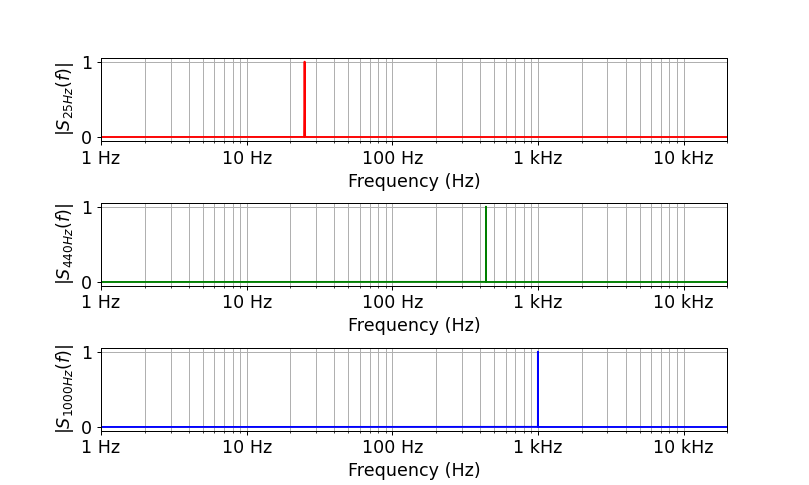

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6)) 
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(freqs_sides25, abs(S_side25), "r") # plotting the positive fft spectrum
ax1.set_xscale('log')
ax1.axis([1, 20000, -0.05, 1.05])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$|S_{25Hz}(f)|$')
ax1.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax1.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

#figura 2, ax2
ax2.plot(freqs_sides440, abs(S_side440), "g") # plotting the positive fft spectrum
ax2.set_xscale('log')
ax2.axis([1, 20000, -0.05, 1.05])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('$|S_{440Hz}(f)|$')
ax2.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax2.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

#figura 3, ax3
ax3.plot(freqs_sides1000, abs(S_side1000), "b") # plotting the positive fft spectrum
ax3.set_xscale('log')
ax3.axis([1, 20000, -0.05, 1.05])
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('$|S_{1000Hz}(f)|$')
ax3.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax3.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

<IPython.core.display.Javascript object>


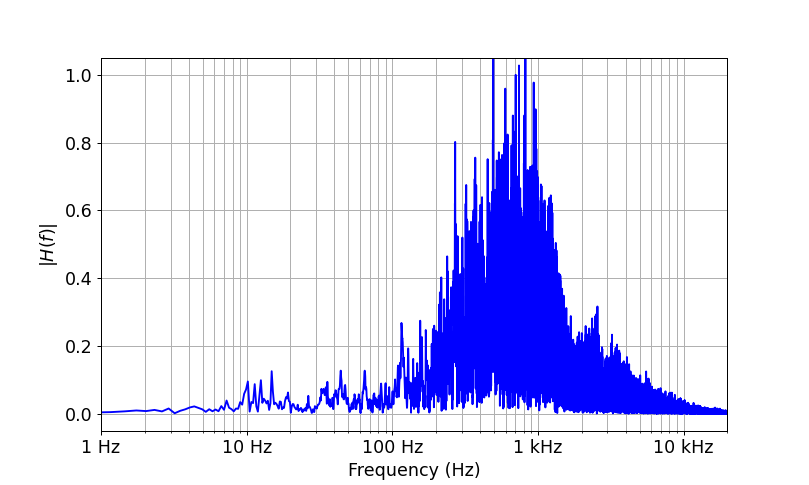

In [15]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) 
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(freqs_sideh, abs(H_side), "b") # plotting the positive fft spectrum
ax1.set_xscale('log')
ax1.axis([1, 20000, -0.05, 1.05])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$|H(f)|$')
ax1.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax1.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

In [16]:
a25=[H, S25]
max_len25 = max([len(x) for x in a25])
print(max_len25)

a440 = [H, S440]
max_len440 = max([len(x) for x in a440])
print(max_len440)

a1000 = [H, S1000]
max_len1000 = max([len(x) for x in a1000])
print(max_len440)

220500
220500
220500


In [17]:
output25   = [np.pad(x, (0, max_len25 - len(x)), 'constant') for x in a25]
output440  = [np.pad(x, (0, max_len440 - len(x)), 'constant') for x in a440]
output1000 = [np.pad(x, (0, max_len1000 - len(x)), 'constant') for x in a1000]

HH     = output25[0]
SS25   = output25[1]
SS440  = output440[1]
SS1000 = output1000[1]
print(len(HH))
print(len(SS25))
print(len(SS440))
print(len(SS1000))

220500
220500
220500
220500


In [18]:
Y25   = HH*SS25
Y440  = HH*SS440
Y1000 = HH*SS1000

y25   = ifft(Y25)
y440  = ifft(Y440)
y1000 = ifft(Y1000)

y25_real   = y25.real/max(y25.real)
y440_real  = y440.real/max(y440.real)
y1000_real = y1000.real/max(y1000.real)

print(y25_real)


[0.99716986 0.99706426 0.99688297 ... 0.99756236 0.99745532 0.99730059]


In [ ]:
ipd.Audio(y25_real, rate = fs)

In [ ]:
ipd.Audio(y440_real, rate = fs)

In [ ]:
ipd.Audio(y1000_real, rate = fs)

In [19]:
y25_real          = y25_real/max(y25_real)
y25_real_duration = len(y25_real)/fs
y25_real_time     = np.arange(0,y25_real_duration,1/fs) #time vector

y440_real          = y440_real/max(y440_real)
y440_real_duration = len(y440_real)/fs
y440_real_time     = np.arange(0,y440_real_duration,1/fs) #time vector

y1000_real          = y1000_real/max(y1000_real)
y1000_real_duration = len(y1000_real)/fs
y1000_real_time     = np.arange(0,y1000_real_duration,1/fs) #time vector

<IPython.core.display.Javascript object>


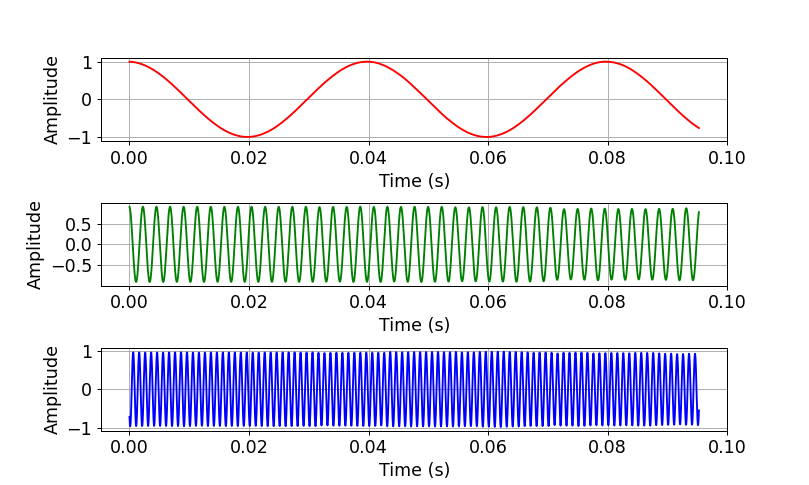

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(y25_real_time[0:4202], y25_real[0:4202], "r") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

#figura 2, ax2
ax2.plot(y440_real_time[0:4202], y440_real[0:4202], "g") # plotting the positive fft spectrum
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.grid()

#figura 3, ax3
ax3.plot(y1000_real_time[0:4202], y1000_real[0:4202], "b") # plotting the positive fft spectrum
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.grid()

In [21]:
slore_filename = 'Lore_mary_had.wav'

fs , slore = scipy.io.wavfile.read(slore_filename)

slore = slore/max(slore)

slore_duration = len(slore)/fs

slore_time = np.arange(0,slore_duration,1/fs) #time vector



<IPython.core.display.Javascript object>


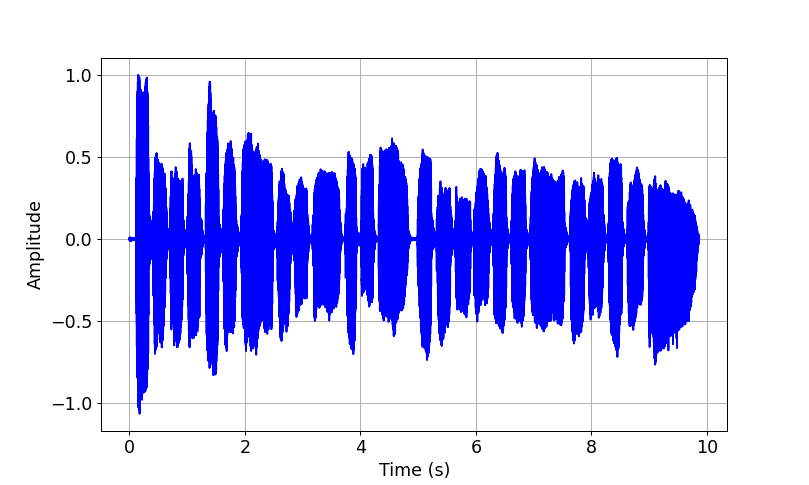

In [22]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(slore_time, slore, "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

In [23]:
ycslore = convolve(slore, h, mode='full')

ycslore   = ycslore/max(ycslore)

ycslore_duration = len(ycslore)/fs

ycslore_time   = np.arange(0,ycslore_duration,1/fs) #time vector

<IPython.core.display.Javascript object>


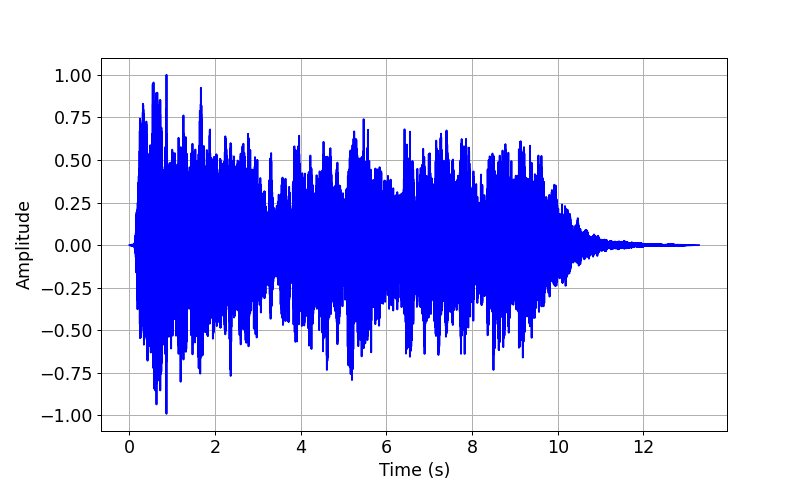

In [24]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(ycslore_time, ycslore, "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()

In [25]:
tslore, freqsslore, freqs_sideslore, Sslore, S_magslore, S_sideslore = TF(slore, fs)

In [26]:
S_sideslore    = abs(S_sideslore)/max(S_sideslore)

<IPython.core.display.Javascript object>


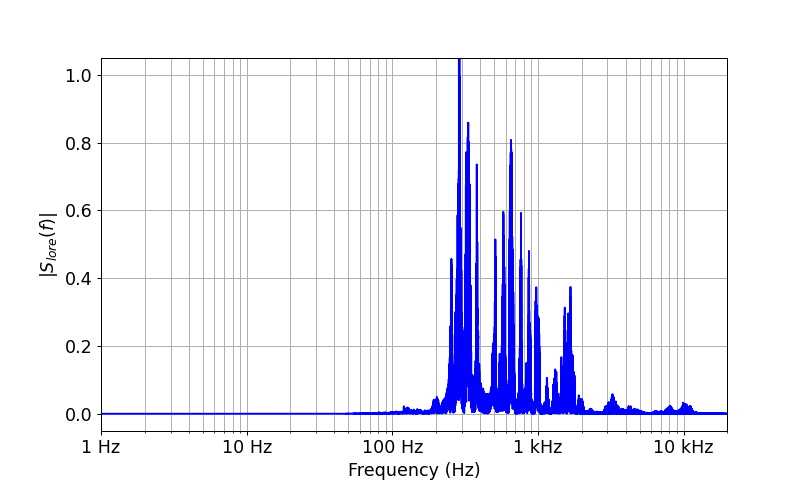

In [27]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) 
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(freqs_sideslore, abs(S_sideslore), "b") # plotting the positive fft spectrum
ax1.set_xscale('log')
ax1.axis([1, 20000, -0.05, 1.05])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('$|S_{lore}(f)|$')
ax1.grid(True, which="both", ls="-")
plt.rcParams.update({'font.size': 14})
# Se define para valores en Hz inmediatamente con este formato predefinido
ax1.xaxis.set_major_formatter(EngFormatter(unit='Hz'))

In [28]:
aslore=[H, Sslore]
max_lenslore = max([len(x) for x in aslore])
print(max_lenslore)

434834


In [29]:
outputslore   = [np.pad(x, (0, max_lenslore - len(x)), 'constant') for x in aslore]

In [30]:
HH     = outputslore[0]
SSslore   = outputslore[1]

In [31]:
Yslore = HH*SSslore

yslore   = ifft(Yslore)

yslore_real   = yslore.real/max(yslore.real)

In [ ]:
ipd.Audio(yslore_real, rate = fs)

In [32]:
yslore_real          = yslore_real/max(yslore_real)
yslore_real_duration = len(yslore_real)/fs
yslore_real_time     = np.arange(0,yslore_real_duration,1/fs) #time vector

<IPython.core.display.Javascript object>


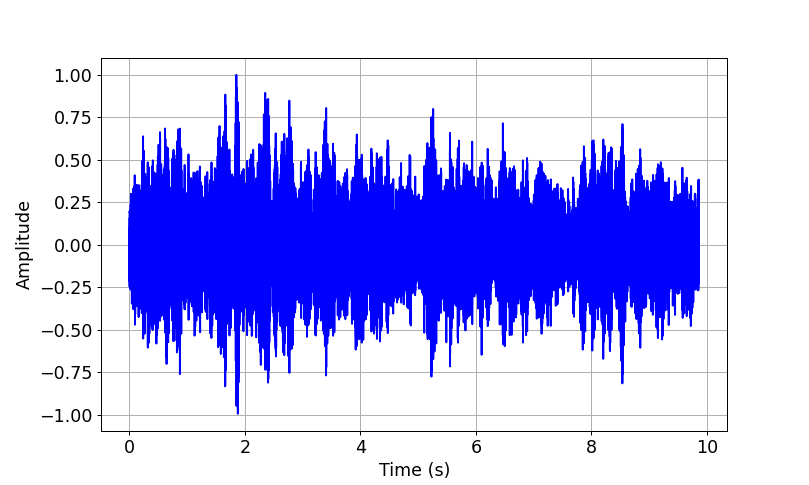

In [33]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6)) # se hace la division de figuras en ax1 y ax2 en dos filas y una columna
#se separan ambos graficos para que no se sobrepongan
fig.subplots_adjust(hspace=0.75)

#figura 1, ax1
ax1.plot(yslore_real_time, yslore_real, "b") # plotting the positive fft spectrum
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid()